**This is an introductory lab. Here, you will learn how to build a standard CNN architecture using TensorFlow.**

Prepared by

**Asif Newaz**

**Lecturer, EEE, IUT**

**Importing Libraries**

In [ ]:
import tensorflow as tf

In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


**Importing Data**

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',   'dog', 'frog', 'horse', 'ship', 'truck']
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

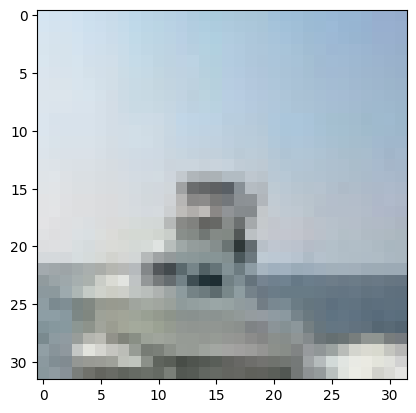

In [ ]:
import matplotlib.pyplot as plt

image = X_train[100]
plt.imshow(image)
plt.show()

In [ ]:
y_train[100]

array([8], dtype=uint8)

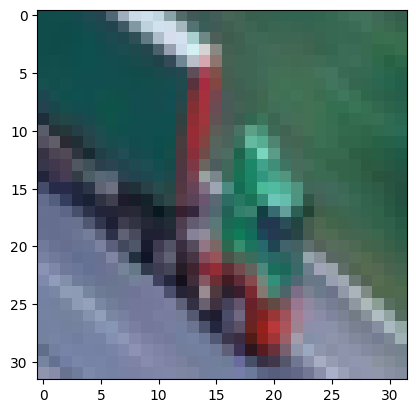

In [ ]:
image = X_train[50]
plt.imshow(image)
plt.show()

In [ ]:
y_train[50]

array([9], dtype=uint8)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

**Creating CNN architecture**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 100)               4

https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model

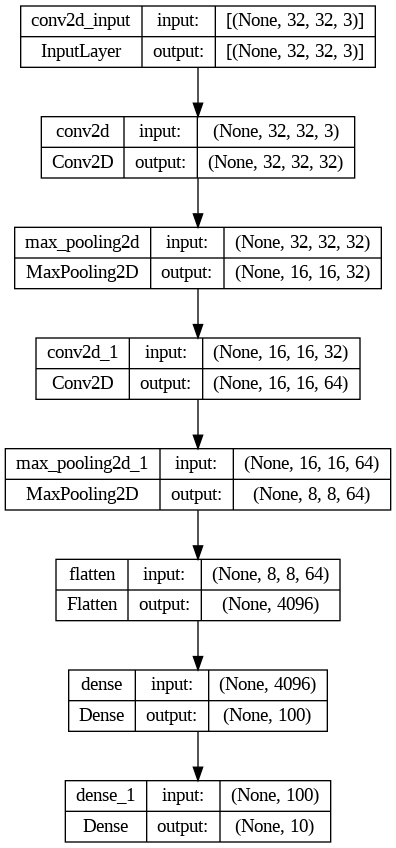

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    dpi=96,
)

**Model Training**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 11s 4ms/step - loss: 1.3421 - accuracy: 0.5228 - val_loss: 1.1378 - val_accuracy: 0.5881
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9836 - accuracy: 0.6562 - val_loss: 0.9793 - val_accuracy: 0.6611
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8492 - accuracy: 0.7049 - val_loss: 0.8919 - val_accuracy: 0.6893
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7556 - accuracy: 0.7383 - val_loss: 0.8545 - val_accuracy: 0.7057
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6693 - accuracy: 0.7655 - val_loss: 0.8547 - val_accuracy: 0.7092
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5987 - accuracy: 0.7893 - val_loss: 0.8780 - val_accuracy: 0.7136
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5259 - accuracy: 0.8153 - val_loss: 0.8640 - val_accuracy: 0.7

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,1.342140,0.52280,1.137813,0.5881
1,0.983565,0.65620,0.979305,0.6611
2,0.849205,0.70494,0.891930,0.6893
3,0.755604,0.73828,0.854545,0.7057
4,0.669293,0.76552,0.854690,0.7092
...,...,...,...,...
95,0.032656,0.99118,5.266515,0.6721
96,0.040086,0.98898,5.051636,0.6840
97,0.034321,0.99040,5.233610,0.6862
98,0.036245,0.99012,5.362893,0.6873


from matplotlib import pyplot as plt
df['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['val_accuracy'].plot(kind='hist', bins=20, title='val_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='loss', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='accuracy', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='val_loss', y='val_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['val_accuracy'].plot(kind='line', figsize=(8, 4), title='val_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

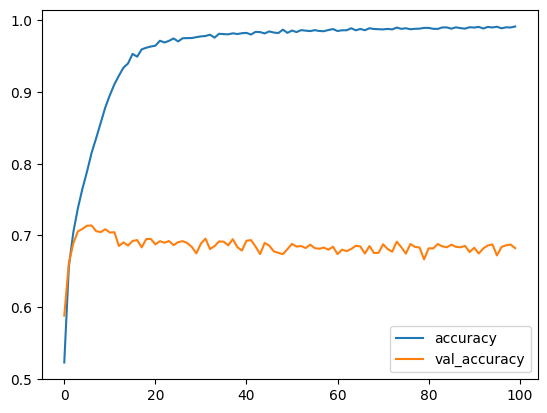

In [ ]:
df[["accuracy","val_accuracy"]].plot();

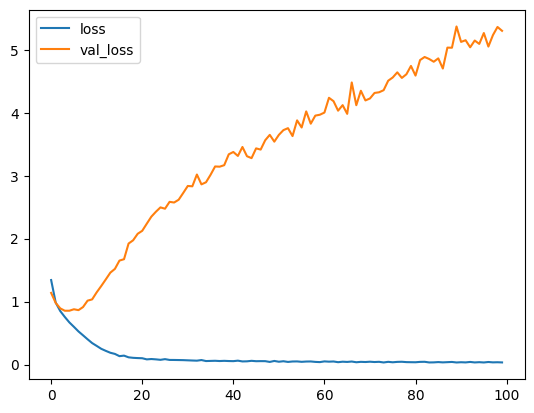

In [ ]:
df[["loss","val_loss"]].plot();

**Model - Version 02**

In [ ]:
model_v2 = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [ ]:
model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

In [ ]:
model_v2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_v2 = model_v2.fit(X_train,y_train, epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 9s 4ms/step - loss: 1.4917 - accuracy: 0.4614 - val_loss: 1.1344 - val_accuracy: 0.5976
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1365 - accuracy: 0.5969 - val_loss: 1.0014 - val_accuracy: 0.6480
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9933 - accuracy: 0.6505 - val_loss: 0.9124 - val_accuracy: 0.6806
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9115 - accuracy: 0.6773 - val_loss: 0.9085 - val_accuracy: 0.6799
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8448 - accuracy: 0.7025 - val_loss: 0.8846 - val_accuracy: 0.6961
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7896 - accuracy: 0.7187 - val_loss: 0.8481 - val_accuracy: 0.7076
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7465 - accuracy: 0.7361 - val_loss: 0.8344 - val_accuracy:

In [ ]:
df_v2 = pd.DataFrame(history_v2.history)
df_v2

,loss,accuracy,val_loss,val_accuracy
0,1.491747,0.46142,1.134373,0.5976
1,1.136527,0.59694,1.001386,0.6480
2,0.993337,0.65046,0.912422,0.6806
3,0.911477,0.67734,0.908469,0.6799
4,0.844799,0.70248,0.884594,0.6961
5,0.789600,0.71866,0.848124,0.7076
6,0.746485,0.73612,0.834394,0.7170
7,0.703557,0.74920,0.824426,0.7178
8,0.666434,0.76242,0.840802,0.7044
9,0.638721,0.77324,0.807669,0.7255


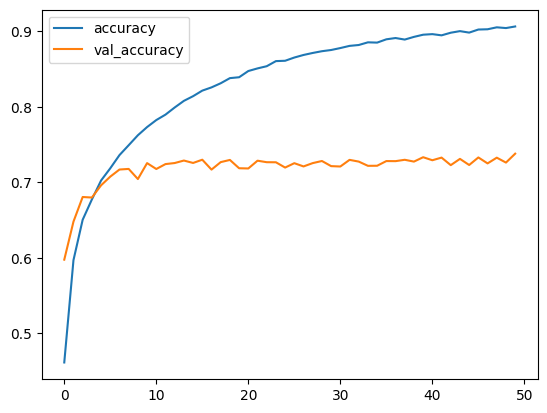

In [ ]:
df_v2[["accuracy","val_accuracy"]].plot();

**Model - Version 03**

In [ ]:
model_v3 = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [ ]:
model_v3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)         

In [ ]:
model_v3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_v3 = model_v3.fit(X_train,y_train, epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 15s 7ms/step - loss: 1.5724 - accuracy: 0.4194 - val_loss: 1.2222 - val_accuracy: 0.5509
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2113 - accuracy: 0.5661 - val_loss: 1.0304 - val_accuracy: 0.6265
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0475 - accuracy: 0.6285 - val_loss: 1.0918 - val_accuracy: 0.6200
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9452 - accuracy: 0.6684 - val_loss: 0.8485 - val_accuracy: 0.7038
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8673 - accuracy: 0.6998 - val_loss: 0.8487 - val_accuracy: 0.7073
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8142 - accuracy: 0.7168 - val_loss: 0.8175 - val_accuracy: 0.7154
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7667 - accuracy: 0.7322 - val_loss: 0.7810 - val_ac

In [ ]:
df_v3 = pd.DataFrame(history_v3.history)
df_v3

,loss,accuracy,val_loss,val_accuracy
0,1.572372,0.41944,1.222189,0.5509
1,1.211268,0.56608,1.030449,0.6265
2,1.047504,0.62846,1.091755,0.6200
3,0.945165,0.66842,0.848466,0.7038
4,0.867262,0.69976,0.848679,0.7073
5,0.814228,0.71676,0.817543,0.7154
6,0.766690,0.73218,0.780992,0.7297
7,0.720695,0.75060,0.729751,0.7509
8,0.690201,0.76094,0.705435,0.7550
9,0.655421,0.77358,0.790100,0.7344


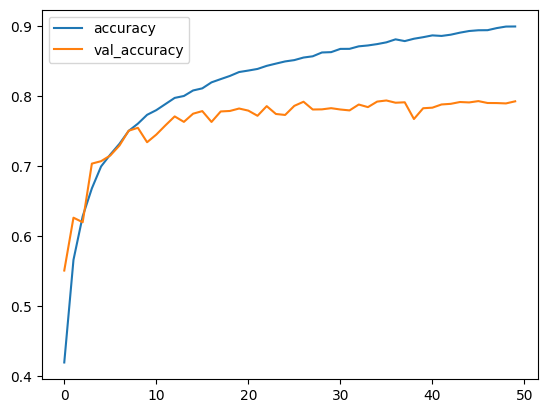

In [ ]:
df_v3[["accuracy","val_accuracy"]].plot();